# Rideshare Price Prediction

### Team:
Marko Masnikosa: mmasniko@syr.edu GitHub: https://github.com/data11y - POC <br>
Dawryn Rosario: darosari@syr.edu GitHub: https://github.com/darosari

## Overview
We are trying to predict hourly pricing for Lyft and Uber trips in New York City. Our approach involves looking to the Taxi and Limousine Commission of New York City data for trip information, weather data, and MTA subway trip data for alternative travel options. With multimodal transport options considered, we hope to be able to provide a model that can inform users to which mode of travel would be more efficient at a time. We believe mass transit options options can help with traffic and transit times for people in NYC.

## Data

### TLC Data  

Taxi and Limousine Commission of NYC data includes trip level data for the entire year. Data is available for Yellow Cabs, Green Cabs (more efficient), For Hire Vehicles, and High-Volume For Hire Vehicles. We focused on the High Volume data as this includes Lyft and Uber trips, as well as smaller rideshare platforms. Data is broken up by year, vehicle type, and month and is available as parquet files. The data is centered around taxi zones which will be explained later. [TLC data](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page) <p> Data Preprocessing:
* **Data Collection**: Data was collected for the year of 2020 and 2024. The files are large (200MB+ each) so filtering and aggregation was applied.
* **Data Filtering**: The High Volume data included several rideshare app platforms. This was filtered down to just Uber and Lyft, which made up the bulk of the data regardless. There were several features that were dropped for having low variance or high emptiness. Trips where the components of the trip cost were less than the driver pay were dropped, these rows indicated that the driver was paid more than what the rider was charged which is not normally the case.
* **Data Aggregation**: The raw data for each year for just the two apps is over 200 million rows per year. This amount of data was too large to easily handle and was thus aggregated to hourly data split across apps. The categorical features such as pickup location and drop off location were aggregated to the most frequent of that hour. Numerical features such as trip distance were aggregated to the mean and sum of that hour.
* **Taxi Zones**: The data is centered around taxi zones which are zones created by the TLC. Here is a map of the taxi zones in NYC:<br> <img src='pictures/nyc_taxi_zones_satellite_overlay.png' width = "500"/>


Many data exploration questions were asked and examined. Some interesting findings include the following.
* Connections: In the data, pickups are happening across a wide area of taxi zones, but the drop offs are more concentrated to specific zones or are headed out of NYC. Not shown in this image but in more granular exploration showed some taxi zones were serviced much more by one app over another. <br> <img src='pictures/nyc_rideshare_pickup_and_dropoffs_2024.png' width = "500" />

* App Dominance: Uber is significantly more used in NYC than Lyft. It would be interesting to have access to the driver payout strucure between the two apps to see why. <br> <img src='pictures/nyc_rideshare_moving_avg_trip_volumes_2024.png' width = "500" />

* Zone Connections: Where are people who are picked up in one zone getting dropped off? It turns out they don't typically leave their taxi zones. This is excluding airport pickups and dropoffs. <br> <img src='pictures/uber_lyft_connections_top_5_2024.png' width = "500" />

* Tips: Lyft riders are more generous than Uber riders when it comes to tipping. <br> <img src='pictures/rider_generosity.png' width = "500" />

### MTA Delays Data EDA - Dawryn
#### 1. Data Loading & Initial Exploration

    In this section, I load the raw MTA Delays dataset and perform an initial inspection of the structure, column names, and datatypes. The goal is to understand what information is available, identify any immediate issues (e.g., null values or formatting problems), and prepare for further preprocessing.

Some questions that can be asnwered:
- What are the key columns in this dataset?
- What is the size of the dataset?
- Are there any obvious missing or corrupted values?

In [ ]:
import pandas as pd

# link for MTA DELAYS: https://data.ny.gov/Transportation/MTA-Subway-Trains-Delayed-Beginning-2020/wx2t-qtaz/about_data
delays_df = pd.read_csv("MTA_Subway_Trains_Delayed__Beginning_2020_20250331.csv") #when the MTA DELAYS file is local
delays_df.head()#showing first few rows


,month,division,line,day_type,reporting_category,subcategory,delays
0,2024-12-01,A DIVISION,1,1,Crew Availability,Crew Availability,83
1,2024-12-01,A DIVISION,1,1,External Factors,External Debris on Roadbed,4
2,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,Braking,37
3,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,34
4,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,"Fire, Smoke, Debris",37


#### 2. Exploratory Data Analysis (EDA) – MTA Delays

    This section explores trends and distributions in the subway delay data to better understand temporal patterns, types of delays, and how delays vary across subway lines.

I aim to answer:
- What are the most common types of delays?
- Are certain subway lines more frequently delayed?
- Do delays occur more often at certain times or days?
- Are delays increasing or decreasing over time?

🧾 Dataset Overview:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40503 entries, 0 to 40502
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   month               40503 non-null  object
 1   division            40503 non-null  object
 2   line                40503 non-null  object
 3   day_type            40503 non-null  int64 
 4   reporting_category  40503 non-null  object
 5   subcategory         38254 non-null  object
 6   delays              40503 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.2+ MB
None

🔍 Null Values:
month                    0
division                 0
line                     0
day_type                 0
reporting_category       0
subcategory           2249
delays                   0
dtype: int64

📄 First 5 Rows:


,month,division,line,day_type,reporting_category,subcategory,delays
0,2024-12-01,A DIVISION,1,1,Crew Availability,Crew Availability,83
1,2024-12-01,A DIVISION,1,1,External Factors,External Debris on Roadbed,4
2,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,Braking,37
3,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,34
4,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,"Fire, Smoke, Debris",37



📌 Top Reporting Categories:
reporting_category
Infrastructure & Equipment    19744
Police & Medical               6864
Planned ROW Work               6187
External Factors               2833
Crew Availability              2463
Operating Conditions           2412
Name: count, dtype: int64

📌 Top Specific Subcategories:
subcategory
Public Conduct, Crime, Police Response    2547
Crew Availability                         2463
Other - Sig                               2421
Subways Maintenance                       2416
Sick/Injured Customer                     2242
Service Delivery                          2239
Persons on Roadbed                        2075
Other - CE                                1981
Rail and Roadbed                          1976
Door-Related                              1862
Name: count, dtype: int64

🚇 Most Affected Subway Lines:
line
A    2294
N    2294
2    2237
D    2168
F    2154
Q    2154
R    2115
4    2089
6    2017
1    1997
Name: count, dtype: int64


/tmp/ipykernel_17177/2330047975.py:44: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


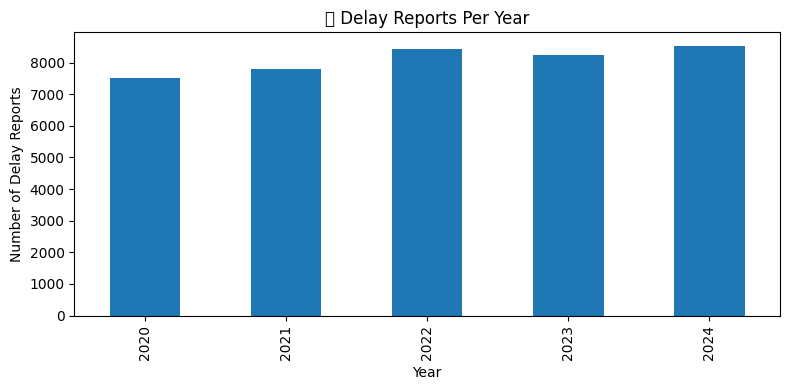

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#load dataset
delays_df = pd.read_csv("MTA_Subway_Trains_Delayed__Beginning_2020_20250331.csv")

# Basic structure
print("🧾 Dataset Overview:")
print("-" * 50)
print(delays_df.info())
print("\n🔍 Null Values:")
print(delays_df.isnull().sum())

# Preview the data
print("\n📄 First 5 Rows:")
display(delays_df.head())

# Top Delay Causes
print("\n📌 Top Reporting Categories:")
print(delays_df['reporting_category'].value_counts().head(10))

print("\n📌 Top Specific Subcategories:")
print(delays_df['subcategory'].value_counts().head(10))


# Most Affected Lines
print("\n🚇 Most Affected Subway Lines:")
print(delays_df['line'].value_counts().head(10))

# Convert date column
delays_df['month'] = pd.to_datetime(delays_df['month'], errors='coerce')

# Extract temporal features
delays_df['Year'] = delays_df['month'].dt.year
delays_df['Month'] = delays_df['month'].dt.month
delays_df['Weekday'] = delays_df['month'].dt.day_name()

# Plot delay count per year
plt.figure(figsize=(8, 4))
delays_df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title("🗓️ Delay Reports Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Delay Reports")
plt.tight_layout()
plt.show()



 #### ✅ EDA Summary – MTA Subway Delays

- The dataset contains **40,503** entries and **7 columns**, covering subway delays across multiple lines and divisions.
- The most frequent **reporting categories** are:
  - Infrastructure & Equipment
  - Crew Availability
  - External Factors
- Common specific causes include door-related issues, braking, and debris on tracks.
- Only the `subcategory` column has missing values (~5.5% of records).
- Delay frequency is reported by month and has been converted to datetime format.
- Additional features (`Year`, `Month`, `Weekday`) were extracted to support temporal analysis.
- A time series plot shows variation in delays across years, providing insight into longer-term trends.

#### 3. Data Cleaning & Feature Engineering – MTA Delays

    This section handles missing values, standardizes categorical text data, and prepares the dataset for downstream modeling. I focus on ensuring consistency in categorical fields and creating useful features from raw columns.

Key steps:
- Fill or tag missing values in `subcategory`
- Normalize text fields to lowercase for consistency
- Ensure all datetime fields are usable
- Prepare for joins with other datasets (e.g., weather, ridership)

In [3]:
#fill missing values in subcategory
delays_df['subcategory'] = delays_df['subcategory'].fillna('Unknown')

#standardize string columns (lowercase, strip whitespace)
for col in ['division', 'line', 'reporting_category', 'subcategory']:
    delays_df[col] = delays_df[col].str.lower().str.strip()

#optional: create a 'day_type_label' if needed
day_type_map = {
    1: 'Weekday',
    2: 'Saturday',
    3: 'Sunday/Holiday'
}
delays_df['day_type_label'] = delays_df['day_type'].map(day_type_map)

#check result
print("🔍 Cleaned Columns Preview:")
display(delays_df[['month', 'division', 'line', 'reporting_category', 'subcategory', 'day_type_label', 'delays']].head())

🔍 Cleaned Columns Preview:


,month,division,line,reporting_category,subcategory,day_type_label,delays
0,2024-12-01,a division,1,crew availability,crew availability,Weekday,83
1,2024-12-01,a division,1,external factors,external debris on roadbed,Weekday,4
2,2024-12-01,a division,1,infrastructure & equipment,braking,Weekday,37
3,2024-12-01,a division,1,infrastructure & equipment,door-related,Weekday,34
4,2024-12-01,a division,1,infrastructure & equipment,"fire, smoke, debris",Weekday,37


In [4]:
# Show cleaned DataFrame structure
print("🧾 Final DataFrame Structure:")
print(delays_df.info())

# Check unique values in key categorical columns
print("\n📌 Unique Reporting Categories:")
print(delays_df['reporting_category'].value_counts())

print("\n📌 Unique Subcategories (Top 10):")
print(delays_df['subcategory'].value_counts().head(10))

print("\n🚇 Unique Subway Lines (Top 10):")
print(delays_df['line'].value_counts().head(10))

print("\n📆 Date Range:")
print(f"From {delays_df['month'].min().date()} to {delays_df['month'].max().date()}")

# Check if datetime features exist and look good
print("\n🧪 Sample of Temporal Features:")
display(delays_df[['month', 'Year', 'Month', 'Weekday']].sample(5))

# Check if day_type_label mapping worked
print("\n📅 Day Type Mapping Preview:")
print(delays_df['day_type_label'].value_counts())


🧾 Final DataFrame Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40503 entries, 0 to 40502
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   month               40503 non-null  datetime64[ns]
 1   division            40503 non-null  object        
 2   line                40503 non-null  object        
 3   day_type            40503 non-null  int64         
 4   reporting_category  40503 non-null  object        
 5   subcategory         40503 non-null  object        
 6   delays              40503 non-null  int64         
 7   Year                40503 non-null  int32         
 8   Month               40503 non-null  int32         
 9   Weekday             40503 non-null  object        
 10  day_type_label      40503 non-null  object        
dtypes: datetime64[ns](1), int32(2), int64(2), object(6)
memory usage: 3.1+ MB
None

📌 Unique Reporting Categories:
reporting_category

,month,Year,Month,Weekday
9326,2023-11-01,2023,11,Wednesday
4609,2024-06-01,2024,6,Saturday
34765,2020-10-01,2020,10,Thursday
39073,2020-03-01,2020,3,Sunday
10809,2023-09-01,2023,9,Friday



📅 Day Type Mapping Preview:
day_type_label
Weekday     24076
Saturday    16427
Name: count, dtype: int64


## Modeling

**TLC Modeling** - Running simple models such as a Random Forest Regressor, we were able to get an MSE of .77 and an $r^2$ goodness of fit value of .94. This was fit onto just the TLC data without much preprocessing or tuning. With a baseline established, we are confident we can achieve better results with further work.

## Problems and Challenges

Some of our datasources are only available at a daily level while others are available at an hourly level, or even more granular. While we would like to use the lowest level of detail we can for modeling, some of these datapoints will appear to have lower variance when joined together.

## Next Steps

As we continue modeling, we will be looking to join in the other datapoints we have available. Some further feature engineering may be needed to align our datasets and to draw out the connections between datapoints.